# PROBLEM AND DATA DESCRIPTION

1. PROBLEM : How to predict accident severity at certain location and certain time so we can get any warning before it happened and government can allocate resource efficiently?
1. DATA : The data set contains severity of the accident in multiple location and some atributes that has potential to predict it such as weather, road condition, light condition etc.

# INTRODUCTION

An accident may happen any time any where. We are intersted to predict the severity of the accident based on some condition that may cause it to happen. I think that who will be interested in this topics are insurance company, transportation company, local government, etc. They may use the result based on their own interest. For insurance company, they migh wanna know whic customer that potentially getting into accident. As a transportation coompany they want to ensure their customer's savety. Local governmetn of course they migh wanna spot the certain location that highly risked of the accident so they can allocate resouce efficeintly in certain location.
<br>
The data set contains severity of the accident in multiple location and some atributes that has potential to predict it such as weather, road condition, light condition etc and also in certain location.

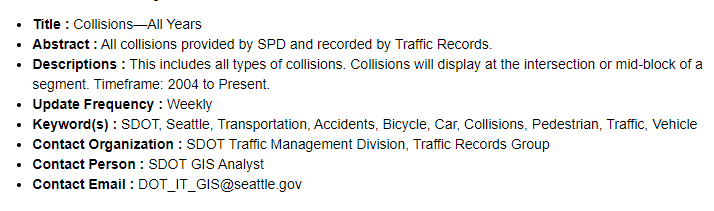

# Library

In [61]:
import pandas as pd
import numpy as np

import folium
import seaborn as sns 
import matplotlib.pyplot as plt

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

# Data

here in this section. we will be doing some data exploration. we want to know about our data such as.
1. is the data valid and reliable ?
1. some question that can be answered from data ?
1. is the data ready for machine learning ?
1. which feature to use ?

In [2]:
df = pd.read_csv('Data-Collisions.csv')

C:\Users\muhyi\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', None)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [5]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

# EDA

> ## missing value

In [8]:
X.isnull().sum()

ADDRTYPE        1926
JUNCTIONTYPE    6329
X               5334
Y               5334
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
SEGLANEKEY         0
CROSSWALKKEY       0
dtype: int64

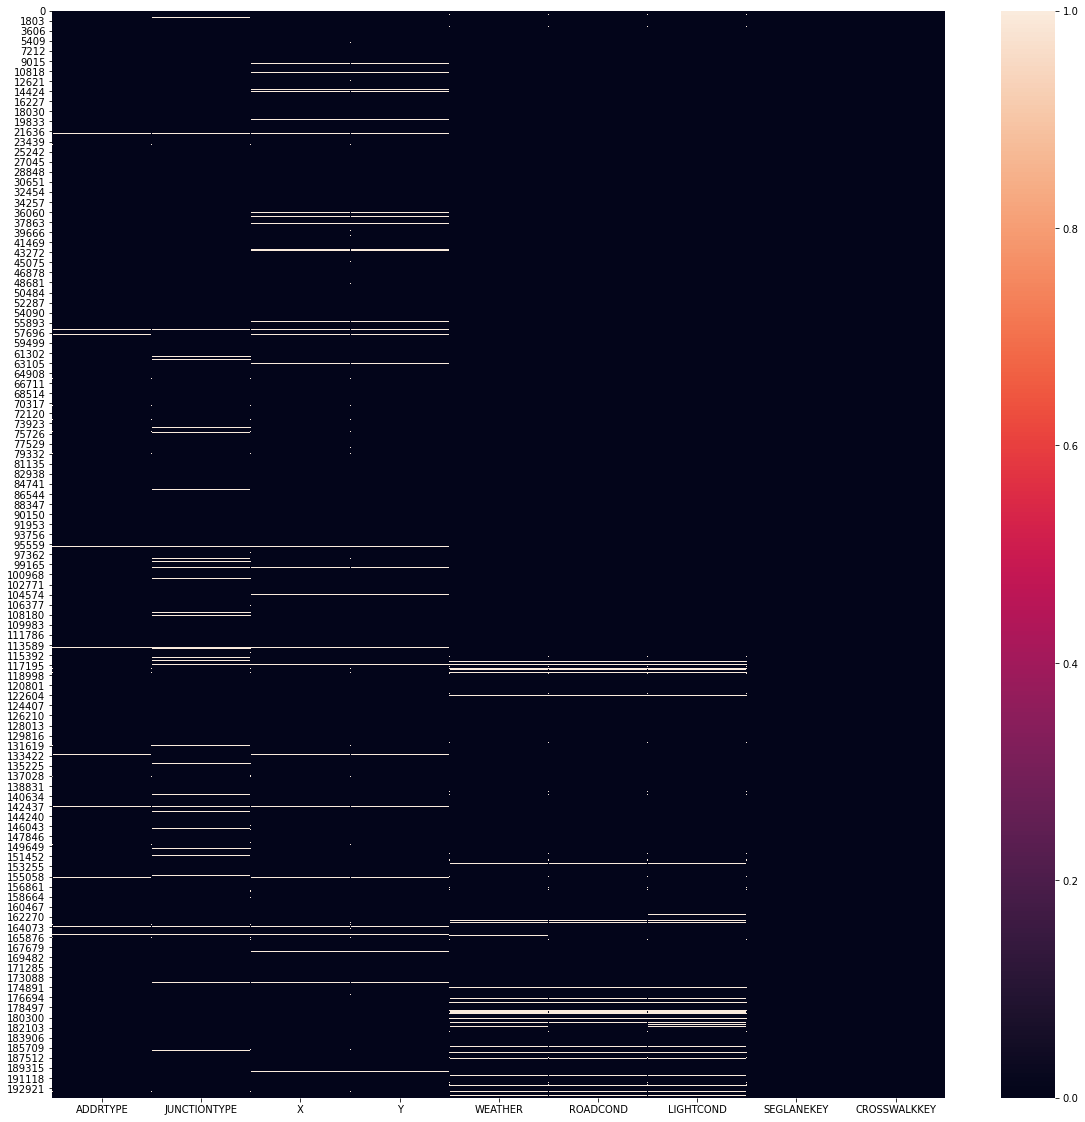

In [9]:
plt.figure(figsize = (20,20))
sns.heatmap(X.isnull())

> ## EDA : SEVERITY

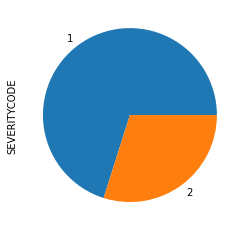

In [10]:
Xy['SEVERITYCODE'].value_counts().plot(kind = 'pie')

In [11]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

> ## EDA : Featute

In [12]:
X

,ADDRTYPE,JUNCTIONTYPE,X,Y,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY
0,Intersection,At Intersection (intersection related),-122.323148,47.703140,Overcast,Wet,Daylight,0,0
1,Block,Mid-Block (not related to intersection),-122.347294,47.647172,Raining,Wet,Dark - Street Lights On,0,0
2,Block,Mid-Block (not related to intersection),-122.334540,47.607871,Overcast,Dry,Daylight,0,0
3,Block,Mid-Block (not related to intersection),-122.334803,47.604803,Clear,Dry,Daylight,0,0
4,Intersection,At Intersection (intersection related),-122.306426,47.545739,Raining,Wet,Daylight,0,0
...,...,...,...,...,...,...,...,...,...
194668,Block,Mid-Block (not related to intersection),-122.290826,47.565408,Clear,Dry,Daylight,0,0
194669,Block,Mid-Block (not related to intersection),-122.344526,47.690924,Raining,Wet,Daylight,0,0
194670,Intersection,At Intersection (intersection related),-122.306689,47.683047,Clear,Dry,Daylight,0,0
194671,Intersection,At Intersection (intersection related),-122.355317,47.678734,Clear,Dry,Dusk,4308,0


In [13]:
cat_var = ['ADDRTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']

for i in cat_var:
    print(X[i].value_counts(), '\n')

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64 

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64 

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64 

Dry               124510
Wet         

> ## Map

In [14]:
Xy[['X','Y','SEVERITYCODE']][:10]

,X,Y,SEVERITYCODE
0,-122.323148,47.703140,2
1,-122.347294,47.647172,1
2,-122.334540,47.607871,1
3,-122.334803,47.604803,1
4,-122.306426,47.545739,2
5,-122.387598,47.690575,1
6,-122.338485,47.618534,1
7,-122.320780,47.614076,2
8,-122.335930,47.611904,1
9,-122.384700,47.528475,2


In [15]:
Xy[['X','Y','SEVERITYCODE']].isnull().sum()

X               5334
Y               5334
SEVERITYCODE       0
dtype: int64

In [16]:
Xy[['X','Y','SEVERITYCODE']].dropna().isnull().sum()

X               0
Y               0
SEVERITYCODE    0
dtype: int64

In [17]:
# colors = {1 : 'red', 2 : 'blue'}

# map_osm = folium.Map(location=[47.703140, -122.323148], zoom_start=11)

# Xy[['X','Y','SEVERITYCODE']].dropna().apply(lambda row:folium.CircleMarker(location=[row["X"], row["Y"]], 
#                                               radius=10, fill_color=colors[row['SEVERITYCODE']])
#                                              .add_to(map_osm), axis=1)

# map_osm

# Methodology

1. data preparation : missing value, categorical encoding
1. modeling : XGBOOST
1. evaluation : f1 score weighted

> ## Data Preparation and Feature Engineering

In [38]:
features = ['ADDRTYPE','JUNCTIONTYPE','X','Y','WEATHER','ROADCOND','LIGHTCOND','SEGLANEKEY','CROSSWALKKEY']
X = df[features] 
y = df['SEVERITYCODE']
Xy = X.copy()
Xy['SEVERITYCODE'] = y 

In [39]:
Xy

,ADDRTYPE,JUNCTIONTYPE,X,Y,WEATHER,ROADCOND,LIGHTCOND,SEGLANEKEY,CROSSWALKKEY,SEVERITYCODE
0,Intersection,At Intersection (intersection related),-122.323148,47.703140,Overcast,Wet,Daylight,0,0,2
1,Block,Mid-Block (not related to intersection),-122.347294,47.647172,Raining,Wet,Dark - Street Lights On,0,0,1
2,Block,Mid-Block (not related to intersection),-122.334540,47.607871,Overcast,Dry,Daylight,0,0,1
3,Block,Mid-Block (not related to intersection),-122.334803,47.604803,Clear,Dry,Daylight,0,0,1
4,Intersection,At Intersection (intersection related),-122.306426,47.545739,Raining,Wet,Daylight,0,0,2
...,...,...,...,...,...,...,...,...,...,...
194668,Block,Mid-Block (not related to intersection),-122.290826,47.565408,Clear,Dry,Daylight,0,0,2
194669,Block,Mid-Block (not related to intersection),-122.344526,47.690924,Raining,Wet,Daylight,0,0,1
194670,Intersection,At Intersection (intersection related),-122.306689,47.683047,Clear,Dry,Daylight,0,0,2
194671,Intersection,At Intersection (intersection related),-122.355317,47.678734,Clear,Dry,Dusk,4308,0,2


In [40]:
Xy[~Xy['X'].isnull()&~Xy['JUNCTIONTYPE'].isnull()].isnull().sum()

ADDRTYPE           0
JUNCTIONTYPE       0
X                  0
Y                  0
WEATHER         4831
ROADCOND        4766
LIGHTCOND       4907
SEGLANEKEY         0
CROSSWALKKEY       0
SEVERITYCODE       0
dtype: int64

In [41]:
Xy = Xy[~Xy['X'].isnull()&~Xy['JUNCTIONTYPE'].isnull()]
y = Xy['SEVERITYCODE']
X = Xy.drop('SEVERITYCODE', axis = 1)

In [42]:
binary_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'Unknown')),
                                    ('binary encoder',ce.BinaryEncoder())
])

preprocessing = ColumnTransformer([
                                 ('binary encoder1',ce.BinaryEncoder(),['ADDRTYPE','JUNCTIONTYPE']),
                                 ('binary encoder2',binary_encoder_pipeline,['WEATHER','ROADCOND','LIGHTCOND'])
                                ], remainder = 'passthrough')

> ## Data Splitting

In [107]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size = 37029,stratify = y, random_state = 10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size = 37029,stratify = y_train_val, random_state = 10)

> ## Modeling Base

In [108]:
skfold = StratifiedKFold(n_splits = 5)
model = XGBClassifier()

estimator = Pipeline([
                      ('preprocess',preprocessing),
                      ('clf',model)
])

In [109]:
model_cv = cross_val_score(estimator, X_train_val, y_train_val, scoring = 'f1')

In [110]:
print('CV score',model_cv)
print('CV score mean',model_cv.mean())
print('CV score std',model_cv.std())

CV score [0.8278546  0.82559921 0.82568278 0.82709094 0.82804337]
CV score mean 0.8268541784525029
CV score std 0.0010409805683566766


In [111]:
model = XGBClassifier()

estimator = Pipeline([
                      ('preprocess',preprocessing),
                      ('clf',model)
])

estimator.fit(X_train_val,y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary encoder1',
                                                  BinaryEncoder(),
                                                  ['ADDRTYPE', 'JUNCTIONTYPE']),
                                                 ('binary encoder2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                                  ['WEATHER', 'ROADCOND',
                      

In [115]:
y_pred = estimator.predict(X_test)
print('recall', recall_score(y_test, y_pred, average = 'weighted'))
print('precision', precision_score(y_test, y_pred, average = 'weighted'))
print('f1', f1_score(y_test, y_pred, average = 'weighted'))

recall 0.7180318129034
precision 0.7247287347232241
f1 0.6400416570519584


> different threshold / tuning threshold 

In [117]:
estimator.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary encoder1',
                                                  BinaryEncoder(),
                                                  ['ADDRTYPE', 'JUNCTIONTYPE']),
                                                 ('binary encoder2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                                  ['WEATHER', 'ROADCOND',
                      

In [146]:
cut_off = [i /100 for i in range(0,100)]
est_score = 0
score_list = []

for i in cut_off:
    y_prob = estimator.predict_proba(X_val)[:,1]
    y_pred = np.where(y_prob>i, 2, 1)
    score_temp = f1_score(y_val, y_pred, average = 'weighted')
    score_list.append(score_temp)
    
    if score_temp > best_score:
        best_score = score_temp
        best_cut_off = i

In [147]:
print('best score',best_score)
print('best cut off',best_cut_off)

best score 0.704731203901153
best cut off 0.38


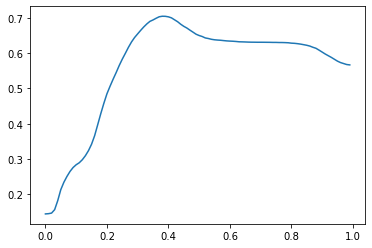

In [148]:
sns.lineplot(cut_off,score_list)

In [149]:
estimator.fit(X_train_val,y_train_val)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary encoder1',
                                                  BinaryEncoder(),
                                                  ['ADDRTYPE', 'JUNCTIONTYPE']),
                                                 ('binary encoder2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                                  ['WEATHER', 'ROADCOND',
                      

In [150]:
y_prob = estimator.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob>best_cut_off, 2, 1)
print('recall', recall_score(y_test, y_pred, average = 'weighted'))
print('precision', precision_score(y_test, y_pred, average = 'weighted'))
print('f1', f1_score(y_test, y_pred, average = 'weighted'))

recall 0.6832482648734776
precision 0.6710222377663628
f1 0.6757530242785738


In [151]:
print('f1', classification_report(y_test, y_pred))

f1               precision    recall  f1-score   support

           1       0.75      0.80      0.78     25645
           2       0.48      0.41      0.44     11384

    accuracy                           0.68     37029
   macro avg       0.62      0.61      0.61     37029
weighted avg       0.67      0.68      0.68     37029



# Result

this model can predict the severity of the accident with 0.68 weighted recall score

# Discussion

recommendation:
<br>
resource allocation based on risk of the severity (>). i.g :
    1. at locaion and time with risk < 0.38 injury --> more ambulance
    1. at locaion and time with risk > 0.38 property --> more firefighters

# Conclussion

we can make our resource allocation more efficiently